<div style="text-align: center; padding: 20px;">
<h1 align="center" style="font-size: 28px; color:rgb(156, 90, 255, 1); width: 100%;">━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━<br>تمرین 3 - بازیابی هوشمند اطلاعات<br>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</h1>
<p style="color: #666; font-size: 16px;">طراح تمرین: فائزه مظفری</p>
<p style="color: #666; font-size: 16px; margin-bottom: 30px;">faezehxmozaffari@gmail.com</p>

<div style="border: 2px dashed rgba(156, 90, 255, 1); border-radius: 8px; padding: 20px; margin: 20px auto; max-width: 500px; text-align: right;">
<p style="color: rgba(156, 90, 255, 1); font-size: 18px; margin-bottom: 15px;"> مشخصات دانشجو:</p>
<p style="color: #666; margin: 5px;">نام و نام خانوادگی: سهیل حاجیان منش</p>
<p style="color: #666; margin: 5px;">شماره دانشجویی: 810100119</p>
<p style="color: #666; margin: 5px;">تاریخ ارسال: .........................</p>
</div>
</div>

<div dir="rtl" style="text-align: justify;  padding: 25px; background-color:rgba(60, 4, 82, 0.21); border-radius: 12px; border: 2px solidrgb(2, 34, 22);"
<div style="line-height: 2.0; font-size: 17px;">
<div style="padding-right:40px">
</div>
<br>

<div style="padding-right:100px">
 ساختار تمرین:

<b>بخش اول - پیاده سازی الگوریتم های رتبه بندی اینترنت  </b>


<b>بخش دوم -پیاده‌سازی TF-IDFبا استفاده از MapReduce  </b>

</div>
</div>


</div>
</div>

# <div style="text-align: center; direction: rtl;"><h1 align="center" style="font-size: 24px; padding: 20px;">━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━<br>بخش اول - پیاده سازی الگوریتم های رتبه بندی اینترنت <br>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</h1></div>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

## <div style="text-align: right; direction: rtl;"> الف</div>


In [54]:
def load_wiki_vote_graph(path: str) -> nx.DiGraph:
    """
    Load the Wikipedia Vote Network as a directed graph.
    Each edge (u, v) means: user u voted for user v.
    """
    G = nx.DiGraph()
    
    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("#"):
                continue

            parts = line.split()

            u, v = parts
            u = int(u)
            v = int(v)
            G.add_edge(u, v)
    
    return G

G = load_wiki_vote_graph("data/Wiki-Vote.txt")
print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

Nodes: 7115, Edges: 103689


In [55]:
def get_in_out_degrees(G: nx.DiGraph):
    """
    Return lists of in-degrees and out-degrees of all nodes.
    """
    in_degrees = [deg for _, deg in G.in_degree()]
    out_degrees = [deg for _, deg in G.out_degree()]
    return in_degrees, out_degrees

in_degrees, out_degrees = get_in_out_degrees(G)

print("Example in-degrees (first 10 nodes):", in_degrees[:10])
print("Example out-degrees (first 10 nodes):", out_degrees[:10])

Example in-degrees (first 10 nodes): [23, 29, 264, 265, 145, 92, 31, 122, 28, 40]
Example out-degrees (first 10 nodes): [5, 0, 273, 33, 137, 0, 23, 133, 41, 7]


<div dir="rtl" style="text-align: justify;  padding: 25px; background-color:rgba(60, 4, 82, 0.21); border-radius: 12px; border: 2px solidrgb(2, 34, 22);"
<div style="line-height: 2.0; font-size: 17px;">
<div style="padding-right:40px">
</div>
<div style="padding-right:100px">
<b>توزیع درجه ورودی و خروجی</b>
</div>


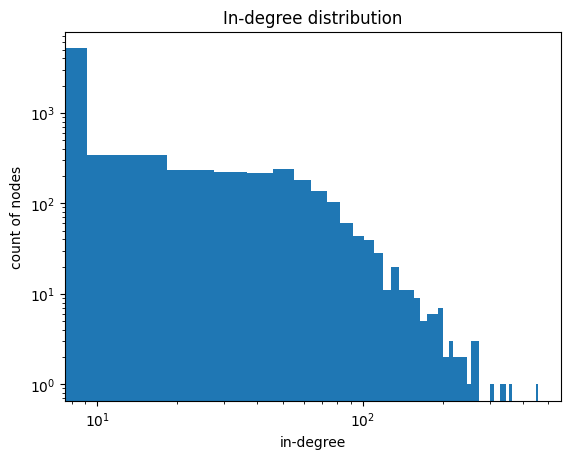

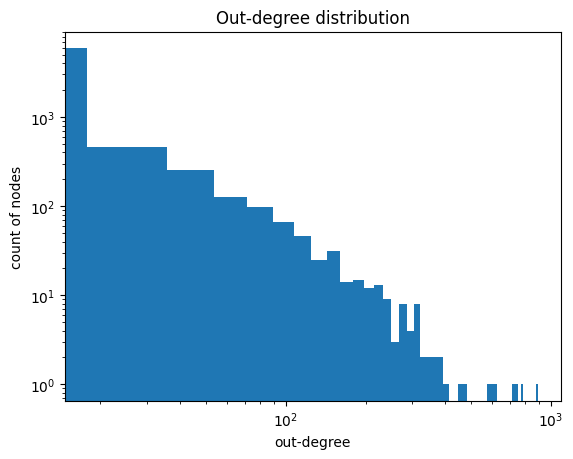

In [56]:
def plot_degree_distributions(in_degrees, out_degrees, bins=50):
    plt.figure()
    plt.hist(in_degrees, bins=bins)
    plt.xlabel("in-degree")
    plt.ylabel("count of nodes")
    plt.title("In-degree distribution")
    plt.yscale("log")
    plt.xscale("log")
    plt.show()

    plt.figure()
    plt.hist(out_degrees, bins=bins)
    plt.xlabel("out-degree")
    plt.ylabel("count of nodes")
    plt.title("Out-degree distribution")
    plt.yscale("log")
    plt.xscale("log")
    plt.show()

plot_degree_distributions(in_degrees, out_degrees)

In [57]:
def top_k_by_degree(G: nx.DiGraph, k: int = 10):
    in_deg = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:k]
    out_deg = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:k]
    return in_deg, out_deg

top_in, top_out = top_k_by_degree(G, k=10)
print("Top 10 by in-degree:", top_in)
print("Top 10 by out-degree:", top_out)

Top 10 by in-degree: [(4037, 457), (15, 361), (2398, 340), (2625, 331), (1297, 309), (2565, 274), (762, 272), (2328, 266), (5254, 265), (3352, 264)]
Top 10 by out-degree: [(2565, 893), (766, 773), (11, 743), (457, 732), (2688, 618), (1166, 599), (1549, 587), (1151, 472), (1374, 462), (1133, 399)]


<div dir="rtl" style="text-align: justify;  padding: 25px; background-color:rgba(60, 4, 82, 0.21); border-radius: 12px; border: 2px solidrgb(2, 34, 22);"
<div style="line-height: 2.0; font-size: 17px;">
<div style="padding-right:40px">
</div>
<div style="padding-right:100px">
نود هایی که بیشترین in-degree رو دارند، یعنی بیشترین رای را آورده اند و محبوب هستند، نود هایی که بیشتری out_degree  را دارند، یعنی بیشترین مشارکت را در رای گیری داشته اند.
</div>


In [58]:
import pandas as pd


def build_degree_dataframe(G: nx.DiGraph) -> pd.DataFrame:
    """
    Build a DataFrame with node, in-degree, out-degree.
    """
    data = []
    for node in G.nodes():
        in_d = G.in_degree(node)
        out_d = G.out_degree(node)
        data.append({"node": node, "in_degree": in_d, "out_degree": out_d})
    df = pd.DataFrame(data)
    return df


df_deg = build_degree_dataframe(G)

print(df_deg.sort_values("in_degree", ascending=False).head(10))
print(df_deg.sort_values("out_degree", ascending=False).head(10))

     node  in_degree  out_degree
326  4037        457          15
409    15        361          50
905  2398        340          62
711  2625        331           0
247  1297        309          76
699  2565        274         893
432   762        272          50
666  2328        266         215
3    5254        265          33
2    3352        264         273
      node  in_degree  out_degree
699   2565        274         893
2374   766          0         773
408     11          0         743
2013   457          0         732
3714  2688          0         618
1052  1166        144         599
286   1549        245         587
483   1151         71         472
517   1374         89         462
2665  1133          0         399


<div dir="rtl" style="text-align: justify;  padding: 25px; background-color:rgba(60, 4, 82, 0.21); border-radius: 12px; border: 2px solidrgb(2, 34, 22);">
<div style="line-height: 2.0; font-size: 17px;">
<div style="padding-right:40px">
</div>
<div style="padding-right:100px">
همان طور که در جدول پیداست اکثر افرادی که مشارکت بالایی در انتخابات داشته اند(out-degree بالا) رای زیادی نیاورده اند و خیلی از آنها نیز 0 رای آورده اند. 

از طرفی افرادی هم که محبوب بوده و رای زیادی آورده اند(out-degree بالا)، معمولا مشارکت و تعداد رای هایی که داده اند پایین تر است.

البته استثنا هم در این بین وجود دارد، مثلا نود 2565 علاوه بر این که بیشتری مشارکت را در رای گیری داشته (893 رای)، 6 امین فرد محبوب انتخابات نیز بوده است.(با 274 رای)
</div>


## <div style="text-align: right; direction: rtl;"> ب</div>


In [59]:
def pagerank(G: nx.DiGraph, alpha=0.15, tol=0.001, max_iter=200):
    nodes = list(G.nodes())
    N = len(nodes)

    idx = {node: i for i, node in enumerate(nodes)}

    out_deg = {node: G.out_degree(node) for node in nodes}

    M = np.zeros((N, N), dtype=float)

    for i, u in enumerate(nodes):
        if out_deg[u] == 0:
            M[:, i] = 1.0 / N
        else:
            for v in G.successors(u):
                j = idx[v]
                M[j, i] = 1.0 / out_deg[u]

    PR = np.ones(N) / N
    teleport = np.ones(N) / N

    iterations = 0

    for it in range(max_iter):
        PR_new = alpha * teleport + (1 - alpha) * (M @ PR)

        diff = np.linalg.norm(PR_new - PR, ord=1)
        iterations += 1

        PR = PR_new

        if diff < tol:
            break

    return PR, iterations

In [60]:
alphas = [0.5, 0.3, 0.15, 0.05]

results = {}

for a in alphas:
    print(f"Running PageRank for alpha = {a} ...")
    pr, iters = pagerank(G, alpha=a, tol=0.001)
    results[a] = {"pagerank": pr, "iterations": iters}
    print(f"Finished. Iterations = {iters}\n")

Running PageRank for alpha = 0.5 ...
Finished. Iterations = 5

Running PageRank for alpha = 0.3 ...
Finished. Iterations = 6

Running PageRank for alpha = 0.15 ...
Finished. Iterations = 7

Running PageRank for alpha = 0.05 ...
Finished. Iterations = 8



## <div style="text-align: right; direction: rtl;"> ج</div>


In [61]:
def hits(G: nx.DiGraph, tol=0.001, max_iter=200):
    nodes = list(G.nodes())
    N = len(nodes)
    idx = {node: i for i, node in enumerate(nodes)}

    A = np.zeros((N, N), dtype=float)
    for u, v in G.edges():
        i = idx[u]
        j = idx[v]
        A[i, j] = 1.0

    hub = np.ones(N)
    auth = np.ones(N)

    iterations = 0

    for it in range(max_iter):
        auth_new = A.T @ hub

        s = auth_new.sum()
        if s > 0:
            auth_new = auth_new / s

        hub_new = A @ auth_new

        s = hub_new.sum()
        if s > 0:
            hub_new = hub_new / s

        diff_auth = np.linalg.norm(auth_new - auth, ord=1)
        diff_hub = np.linalg.norm(hub_new - hub, ord=1)
        diff = max(diff_auth, diff_hub)

        iterations += 1
        auth = auth_new
        hub = hub_new

        if diff < tol:
            break

    return nodes, auth, hub, iterations

In [62]:
nodes_hits, auth_scores_hits, hub_scores_hits, hits_iters = hits(G, tol=0.001)
print("HITS iterations:", hits_iters)

HITS iterations: 6


In [63]:
def top_k_scores(nodes, scores, k=10):
    idx_sorted = np.argsort(-scores)
    top_idx = idx_sorted[:k]
    return [(nodes[i], float(scores[i])) for i in top_idx]


top10_auth_hits = top_k_scores(nodes_hits, auth_scores_hits, k=10)
top10_hub_hits = top_k_scores(nodes_hits, hub_scores_hits, k=10)

print("Top 10 Authorities (HITS):")
for node, score in top10_auth_hits:
    print(node, score)

print("\nTop 10 Hubs (HITS):")
for node, score in top10_hub_hits:
    print(node, score)

Top 10 Authorities (HITS):
2398 0.0025795969269019254
4037 0.0025728128363705725
3352 0.002328037039683805
1549 0.002303659322477169
762 0.0022562209941068712
3089 0.0022529226570821973
1297 0.0022510184981929557
2565 0.0022232223677048357
15 0.002201328050055245
2625 0.0021985105758015955

Top 10 Hubs (HITS):
2565 0.007939510092682204
766 0.007573619132760508
2688 0.006439165997434949
457 0.00641669333282582
1166 0.006010563775609426
1549 0.005721382500572735
11 0.004922769497362764
1151 0.004572539335988934
1374 0.0044678250989464326
1133 0.0039183247826845525


In [64]:
pr_nodes = list(G.nodes())  
pr_scores, pr_iters = results[0.15]["pagerank"], results[0.15]["iterations"]

top10_pr = top_k_scores(pr_nodes, pr_scores, k=10)

print("Top 10 PageRank (alpha=0.15):")
for node, score in top10_pr:
    print(node, score)

Top 10 PageRank (alpha=0.15):
4037 0.004607484395379538
15 0.0036801920557834942
6634 0.0035697588856128987
2625 0.00328478627829926
2398 0.0026080375815897084
2470 0.002524754890677627
2237 0.0024978382264644722
4191 0.002267401497016344
7553 0.0021693637798325554
5254 0.0021500569410050686


In [65]:
set_auth = set(n for n, _ in top10_auth_hits)
set_pr = set(n for n, _ in top10_pr)

common_auth_pr = set_auth & set_pr

print("\nCommon nodes between top-10 Authority and top-10 PageRank:")
print(common_auth_pr)
print("count:", len(common_auth_pr))


Common nodes between top-10 Authority and top-10 PageRank:
{2625, 4037, 2398, 15}
count: 4


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">

### مقایسه Top-10 Authority (HITS) با Top-10 PageRank
      
از آنجا صرفا در 4 تا از 10 رنک اول اشتراک دارند میتوان به این نتیجه رسید که لزوما Authority بالا در HITS لزوما نشانه PageRank بالا نیست چون در HITS زمانی یک گرهAuthority بالایی میگیرد که از نود های با امتیاز Hub بالا به آن اشاره شده باشد ولی در PageRank وزن یک نود از تمام لینک های ورودی صرف نظر از اینکه از Hub قوی هستند یا نه، تاثیر می پذیرد.
            
نود هایی که مشترک هستند احتمالا هم لینک های ورودی متعددی دارند و هم نود های Hub معتبری به آن ها لینک دارند.
           
نود هایی که Authority بالا دارند اما PageRank پایین احتمالا لینک های ورودی کمی داشته اند اما همان تعداد کم از Hub های معتبری بوده است.

In [66]:
set_hub = set(n for n, _ in top10_hub_hits)
set_out_degree = set(n for n, _ in top_out)

common_hub_out_degree = set_hub & set_out_degree

print("\nCommon nodes between top-10 Hubs and top-10 out-degree:")
print(common_hub_out_degree)
print("count:", len(common_hub_out_degree))


Common nodes between top-10 Hubs and top-10 out-degree:
{2688, 2565, 457, 11, 1549, 1166, 1133, 766, 1374, 1151}
count: 10


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">

### مقایسه Top-10 Hub (HITS) با Top-10 out-degree

از یکسان بودن و هم پوشانی کامل بین این دو نتیجه می توان به این پی برد که امتیاز Hub در الگوریتم HITS با میزان out-degree  یک نود همبستگی بالا و رابطه مستقیمی دارد.

## <div style="text-align: right; direction: rtl;"> د</div>


In [67]:
def salsa(G: nx.DiGraph, tol=0.001, max_iter=200):
    nodes = list(G.nodes())
    N = len(nodes)
    idx = {node: i for i, node in enumerate(nodes)}

    edges = []
    for u, v in G.edges():
        ui = idx[u]
        vi = idx[v]
        edges.append((ui, vi))

    outdeg = np.zeros(N, dtype=float)
    indeg = np.zeros(N, dtype=float)
    for ui, vi in edges:
        outdeg[ui] += 1
        indeg[vi] += 1

    outdeg_safe = outdeg.copy()
    indeg_safe = indeg.copy()
    outdeg_safe[outdeg_safe == 0] = 1.0
    indeg_safe[indeg_safe == 0] = 1.0

    hub = np.ones(N)
    auth = np.ones(N)

    iterations = 0

    for it in range(max_iter):
        auth_new = np.zeros(N, dtype=float)
        for ui, vi in edges:
            auth_new[vi] += hub[ui] / outdeg_safe[ui]

        s = auth_new.sum()
        if s > 0:
            auth_new /= s

        hub_new = np.zeros(N, dtype=float)
        for ui, vi in edges:
            hub_new[ui] += auth_new[vi] / indeg_safe[vi]

        s = hub_new.sum()
        if s > 0:
            hub_new /= s

        diff_auth = np.linalg.norm(auth_new - auth, ord=1)
        diff_hub = np.linalg.norm(hub_new - hub, ord=1)
        diff = max(diff_auth, diff_hub)

        iterations += 1
        auth = auth_new
        hub = hub_new

        if diff < tol:
            break

    return nodes, auth, hub, iterations

In [68]:
nodes_salsa, auth_scores_salsa, hub_scores_salsa, salsa_iters = salsa(G, tol=0.001)
print("SALSA iterations (full graph):", salsa_iters)

SALSA iterations (full graph): 10


In [69]:
top10_auth_salsa_full = top_k_scores(nodes_salsa, auth_scores_salsa, k=10)
top10_hub_salsa_full = top_k_scores(nodes_salsa, hub_scores_salsa, k=10)

print("Top 10 Authorities (SALSA, full graph):")
for node, score in top10_auth_salsa_full:
    print(node, score)

print("\nTop 10 Hubs (SALSA, full graph):")
for node, score in top10_hub_salsa_full:
    print(node, score)

Top 10 Authorities (SALSA, full graph):
4037 0.004384840809120414
15 0.0034636886370391674
2398 0.0032612573417183603
2625 0.003176441294711642
1297 0.002967148250820493
2565 0.0026277833831073565
762 0.0026108235101690116
2328 0.0025510164480728537
5254 0.002542740153972428
3352 0.00253196936586616

Top 10 Hubs (SALSA, full graph):
2565 0.008565563548568819
766 0.007415618975647694
11 0.0071435642323347355
457 0.007025136707821109
2688 0.0059263939142516165
1166 0.00574732304401463
1549 0.005633603476949707
1151 0.004530503128432131
1374 0.004433337797975964
1133 0.003827339164270294


In [70]:
set_auth_salsa_full = set(n for n, _ in top10_auth_salsa_full)
set_auth_hits = set(n for n, _ in top10_auth_hits)

print(
    "Common top-10 Authorities (SALSA vs HITS, full graph):",
    set_auth_salsa_full & set_auth_hits,
)


set_hub_salsa_full = set(n for n, _ in top10_hub_salsa_full)
set_hub_hits = set(n for n, _ in top10_hub_hits)

print(
    "Common top-10 Hubs (SALSA vs HITS, full graph):", set_hub_salsa_full & set_hub_hits
)

Common top-10 Authorities (SALSA vs HITS, full graph): {2625, 2565, 4037, 15, 1297, 3352, 762, 2398}
Common top-10 Hubs (SALSA vs HITS, full graph): {2688, 2565, 457, 11, 1549, 1166, 1133, 766, 1374, 1151}


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">
نتایج HITS و SALSA که یک Variation ی از HITS است تقریبا یکسان است و تنها در 2 تا از Top Authority ها باهم تفاوت دارند.
این 2 تفاوت هم در رتبه های اخر می باشد که نشان می دهد هر دو الگوریتم در گره های Authority و Hub قوی و معتبر رفتار یکسانی و نتیجه مشابهی دارند.

In [71]:
nodes_high_in = [node for node, deg in G.in_degree() if deg > 10]

G_sub = G.subgraph(nodes_high_in).copy()
print("Subgraph nodes:", G_sub.number_of_nodes(), "edges:", G_sub.number_of_edges())

nodes_salsa_sub, auth_scores_salsa_sub, hub_scores_salsa_sub, salsa_iters_sub = salsa(G_sub, tol=0.001)
print("SALSA iterations (subgraph):", salsa_iters_sub)

top10_auth_salsa_sub = top_k_scores(nodes_salsa_sub, auth_scores_salsa_sub, k=10)
top10_hub_salsa_sub = top_k_scores(nodes_salsa_sub, hub_scores_salsa_sub, k=10)

print("\nTop 10 Authorities (SALSA, subgraph):")
for node, score in top10_auth_salsa_sub:
    print(node, score)

print("\nTop 10 Hubs (SALSA, subgraph):")
for node, score in top10_hub_salsa_sub:
    print(node, score)

Subgraph nodes: 1906 edges: 54945
SALSA iterations (subgraph): 11

Top 10 Authorities (SALSA, subgraph):
4037 0.0033264417910935672
2625 0.0033147672878850063
1297 0.003226971042496194
2398 0.003127734355080437
15 0.003000615706118768
762 0.0028056393480073005
2328 0.0028024856130199603
2066 0.002695700065541467
1549 0.00263840510708548
3089 0.0026178860693816777

Top 10 Hubs (SALSA, subgraph):
2565 0.01584922960267405
1166 0.010751005275795018
1549 0.010413716376456323
1151 0.008554057649289206
1374 0.008401601545338986
5524 0.006971572631848571
5802 0.006698769182392002
1608 0.006432164800543861
2972 0.006178003021575799
2485 0.005872543209422782


In [72]:
set_auth_full = set(n for n, _ in top10_auth_salsa_full)
set_auth_sub = set(n for n, _ in top10_auth_salsa_sub)

set_hub_full = set(n for n, _ in top10_hub_salsa_full)
set_hub_sub = set(n for n, _ in top10_hub_salsa_sub)

print("\nAuthority overlap (full vs subgraph):", set_auth_full & set_auth_sub)
print("Hub overlap (full vs subgraph):", set_hub_full & set_hub_sub)


Authority overlap (full vs subgraph): {2625, 4037, 15, 1297, 2328, 762, 2398}
Hub overlap (full vs subgraph): {2565, 1549, 1166, 1374, 1151}


In [73]:
auth_full_dict = {node: score for node, score in top10_auth_salsa_full}
hub_full_dict = {node: score for node, score in top10_hub_salsa_full}

auth_sub_dict = {node: score for node, score in top10_auth_salsa_sub}
hub_sub_dict = {node: score for node, score in top10_hub_salsa_sub}

In [75]:
all_nodes_auth = set_auth_full | set_auth_sub
all_nodes_hub = set_hub_full | set_hub_sub

In [76]:
df_auth = pd.DataFrame(
    [
        {
            "node": node,
            "authority_full": auth_full_dict.get(node),
            "authority_sub": auth_sub_dict.get(node),
        }
        for node in all_nodes_auth
    ]
)

df_hub = pd.DataFrame(
    [
        {
            "node": node,
            "hub_full": hub_full_dict.get(node),
            "hub_sub": hub_sub_dict.get(node),
        }
        for node in all_nodes_hub
    ]
)

display(df_auth)
display(df_hub)

,node,authority_full,authority_sub
0,2625,0.003176,0.003315
1,4037,0.004385,0.003326
2,2565,0.002628,NaN
3,5254,0.002543,NaN
4,1549,NaN,0.002638
5,15,0.003464,0.003001
6,1297,0.002967,0.003227
7,2066,NaN,0.002696
8,3089,NaN,0.002618
9,3352,0.002532,NaN


,node,hub_full,hub_sub
0,2688,0.005926,NaN
1,2565,0.008566,0.015849
2,1608,NaN,0.006432
3,457,0.007025,NaN
4,11,0.007144,NaN
5,1549,0.005634,0.010414
6,1166,0.005747,0.010751
7,5524,NaN,0.006972
8,2972,NaN,0.006178
9,1374,0.004433,0.008402


## <div style="text-align: right; direction: rtl;"> ه</div>


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">
در 3 مورد از Top Authority ها تفاوت داریم که این ممکن است به این خاطر باشند که آن نود ها بخشی از امتیازشان بخاطر لینک هایی بوده که از کاربران کم درجه میگرفتند و با حذف آنان امتیازشان پایین آمده است. 


در Hub ها قضیه متفاوت است و فقط 5 اشتراک داریم. چون ماهیت Hub ها اینطور است که لزوما in-degree بالایی ندارند پس احتمالا تعداد زیادی از Hub های خوب قبلی اصلی در زیرگراف جدید وجود ندارند. Hub هایی که باقی مانده اند آنهایی هستند که هم in-degree بالایی دارند و هم out-degree بالایی دارند و حذف نشده اند. در سوال اول لیست برخی از این نود ها آمده است که در اینجا نیز جزو نود های مشترک دو نتیجه هستند.

Hub های جدید آنهایی هستند که هم رای زیادی داده اند و رای دهنده معتبری هستند و هم از طرفی آنقدر رای گرفته که in-degree > 10 داشته باشند. یعنی کاربری که هم زیاد رای می دهد و هم نسبتا محبوبیتی مطلوبی دارد.
در گراف اول Hub ها صرفا افرادی بودند که رای های زیادی داده بودند.

In [77]:
N = G.number_of_nodes()

k = int(0.05 * N)

out_deg = list(G.out_degree())
top_out_nodes = sorted(out_deg, key=lambda x: x[1], reverse=True)[:k]
topic1_nodes = set([node for node, deg in top_out_nodes])

in_deg = list(G.in_degree())
top_in_nodes = sorted(in_deg, key=lambda x: x[1], reverse=True)[:k]
topic2_nodes = set([node for node, deg in top_in_nodes])

In [78]:
nodes = list(G.nodes())
idx = {node: i for i, node in enumerate(nodes)}

e1 = np.zeros(N)
for node in topic1_nodes:
    e1[idx[node]] = 1.0
e1 = e1 / e1.sum()

e2 = np.zeros(N)
for node in topic2_nodes:
    e2[idx[node]] = 1.0
e2 = e2 / e2.sum()

In [81]:
M = np.zeros((N, N))

out_degree = {node: G.out_degree(node) for node in nodes}

for u in nodes:
    i = idx[u]
    if out_degree[u] == 0:
        M[:, i] = 1.0 / N
    else:
        for v in G.successors(u):
            j = idx[v]
            M[j, i] = 1.0 / out_degree[u]

In [82]:
def topic_sensitive_pagerank(M, teleport, alpha=0.15, tol=0.001, max_iter=200):
    N = M.shape[0]
    p = np.ones(N) / N
    iterations = 0

    for it in range(max_iter):
        p_new = alpha * teleport + (1 - alpha) * (M @ p)

        diff = np.linalg.norm(p_new - p, ord=1)
        p = p_new
        iterations += 1

        if diff < tol:
            break

    return p, iterations

In [83]:
alpha = 0.15

pr_topic1, iter1 = topic_sensitive_pagerank(M, e1, alpha=alpha)
pr_topic2, iter2 = topic_sensitive_pagerank(M, e2, alpha=alpha)

print("Iterations Topic 1:", iter1)
print("Iterations Topic 2:", iter2)

Iterations Topic 1: 7
Iterations Topic 2: 8


In [84]:
def top_k(nodes, scores, k=10):
    idx_sorted = np.argsort(-scores)
    return [(nodes[i], float(scores[i])) for i in idx_sorted[:k]]


top10_topic1 = top_k(nodes, pr_topic1)
top10_topic2 = top_k(nodes, pr_topic2)

print("\nTop-10 Topic 1 (top 5% out-degree):")
for n, s in top10_topic1:
    print(n, s)

print("\nTop-10 Topic 2 (top 5% in-degree):")
for n, s in top10_topic2:
    print(n, s)


Top-10 Topic 1 (top 5% out-degree):
4037 0.003629680024035674
6634 0.0032257451314415876
2625 0.0031696517064724815
15 0.00314095275138117
2398 0.00259011709763832
1297 0.002512561751109491
2328 0.0023970532209121485
2237 0.002211165565181545
3352 0.0021860794614018166
737 0.002134313497149021

Top-10 Topic 2 (top 5% in-degree):
4037 0.004279744197147404
15 0.0038425445926060483
2625 0.0037734374288786775
6634 0.0037685148299166863
2398 0.003214240141628154
5412 0.0026770937700111084
4191 0.002671118482054811
2328 0.0025056938616246794
7632 0.0025035970460324285
1297 0.002458300703712561


In [85]:
pr_global = results[0.15]["pagerank"]
top10_global = top_k(nodes, pr_global)

print("\nTop-10 Normal PageRank:")
for n, s in top10_global:
    print(n, s)


Top-10 Normal PageRank:
4037 0.004607484395379538
15 0.0036801920557834942
6634 0.0035697588856128987
2625 0.00328478627829926
2398 0.0026080375815897084
2470 0.002524754890677627
2237 0.0024978382264644722
4191 0.002267401497016344
7553 0.0021693637798325554
5254 0.0021500569410050686


In [86]:
set_global = set(n for n, _ in top10_global)
set_t1 = set(n for n, _ in top10_topic1)
set_t2 = set(n for n, _ in top10_topic2)

print("\nOverlap Topic1 vs Global:", set_global & set_t1)
print("Overlap Topic2 vs Global:", set_global & set_t2)


Overlap Topic1 vs Global: {2625, 4037, 6634, 15, 2237, 2398}
Overlap Topic2 vs Global: {2625, 4037, 6634, 15, 2398, 4191}


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">
این نود های مشترک نود هایی هستند که جزو نود های با بیشترین out-degree و in-degree هستند ولی نود هایی در نتایج pagerank بوده اند ولی در نتایج topic-sensitive pagerank نیستند، به این خاطر است که جزو نودهای topic نبوده اند پس طبیعتا رنک آنها کمتر میشود.

In [87]:
pr_global_dict = {nodes[i]: float(pr_global[i]) for i in range(N)}
pr_topic1_dict = {nodes[i]: float(pr_topic1[i]) for i in range(N)}
pr_topic2_dict = {nodes[i]: float(pr_topic2[i]) for i in range(N)}

top10_global_nodes = [node for node, score in top10_global]
top10_t1_nodes = [node for node, score in top10_topic1]
top10_t2_nodes = [node for node, score in top10_topic2]

all_nodes_topic1 = set(top10_global_nodes) | set(top10_t1_nodes)
all_nodes_topic2 = set(top10_global_nodes) | set(top10_t2_nodes)

In [88]:
df_topic1 = pd.DataFrame(
[
        {
            "node": node,
            "pr_global": pr_global_dict.get(node),
            "pr_topic1": pr_topic1_dict.get(node),
        }
        for node in all_nodes_topic1
    ]
)

display(df_topic1)

,node,pr_global,pr_topic1
0,2625,0.003285,0.003170
1,7553,0.002169,0.001895
2,4037,0.004607,0.003630
3,5254,0.002150,0.001912
4,15,0.003680,0.003141
5,1297,0.001947,0.002513
6,3352,0.001784,0.002186
7,2328,0.002040,0.002397
8,2398,0.002608,0.002590
9,4191,0.002267,0.002111


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">
برای برخی نود ها مقدار pagerank بیشتر است و برای برخی ts pagerank

نود هایی که در topic 1 هستند انتظار می رود tspr بالاتری داشته باشند و همین اتفاق هم افتاده است. به عنوان مثال نود 1297 که در top 10 tspr وجود دارد ولی در top 10 pr وجود ندارد جزو نود های با  out degree بالا است.

In [82]:
df_topic2 = pd.DataFrame(
    [
        {
            "node": node,
            "pr_global": pr_global_dict.get(node),
            "pr_topic2": pr_topic2_dict.get(node),
        }
        for node in all_nodes_topic2
    ]
)

display(df_topic2)

,node,pr_global,pr_topic2
0,2625,0.003285,0.003773
1,7553,0.002169,0.002433
2,4037,0.004607,0.004280
3,5254,0.002150,0.002442
4,15,0.003680,0.003843
5,7632,0.001907,0.002504
6,1297,0.001947,0.002458
7,2328,0.002040,0.002506
8,2398,0.002608,0.003214
9,4191,0.002267,0.002671


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">
تعداد زیادی از گره های امتیاز pagerank شون با هدایت پرش های تصادفی سمت topic 2 رشد داشته است. که به خاطر بوده است که این گره های topic 2 بوده اند و احتمال پرش تصادفی به آن ها در این حالت بیشتر شده نسبت به حالت pagerank که تمام گره ها احتمال یکسانی برای پرش تصادفی داشته اند. به عنوان مثال گره 2625 که هم جزو گره های بالا در in-degree است و هم در out-degree مقدارش افزایش داشته است.
از طرفی برخی نود ها امتیازشان کمتر شده مانند نود 2470 که احتمالا جزو نود هایی هستند که در topic 2 نبوده اند.

# <div style="text-align: center; direction: rtl;"><h1 align="center" style="font-size: 24px; padding: 20px;">━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━<br>بخش دوم - پیاده‌سازی TF-IDFبا استفاده از MapReduce   <br>━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━</h1></div>


In [89]:
import re
import os
import nltk
import math
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import defaultdict

In [90]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()


def preprocess(text):
    text = text.lower()

    text = re.sub(r"[^a-z\s]", " ", text)

    text = re.sub(r"\s+", " ", text)

    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [stemmer.stem(t) for t in tokens]

    return " ".join(tokens)

## <div style="text-align: right; direction: rtl;"> الف</div>


In [92]:
input_path = "./data/Alice’s Adventures in Wonderland.txt"
output_dir = "./data/chapters_preprocessed"

os.makedirs(output_dir, exist_ok=True)

with open(input_path, "r", encoding="utf-8") as f:
    text = f.read()

chapters = re.split(r"\nCHAPTER\s+([IVXLC]+)\.\s*\n", text)

chapter_texts = []
chapter_numbers = []

for i in range(1, len(chapters), 2):
    chapter_numbers.append(chapters[i])
    chapter_texts.append(chapters[i + 1].strip())

for idx, (num, content) in enumerate(zip(chapter_numbers, chapter_texts), start=1):

    processed = preprocess(content)

    filename = f"{output_dir}/chapter_{idx}.txt"

    with open(filename, "w", encoding="utf-8") as f:
        f.write(processed)

    print(f"Saved preprocessed chapter_{idx}.txt (CHAPTER {num})")

Saved preprocessed chapter_1.txt (CHAPTER I)
Saved preprocessed chapter_2.txt (CHAPTER II)
Saved preprocessed chapter_3.txt (CHAPTER III)
Saved preprocessed chapter_4.txt (CHAPTER IV)
Saved preprocessed chapter_5.txt (CHAPTER V)
Saved preprocessed chapter_6.txt (CHAPTER VI)
Saved preprocessed chapter_7.txt (CHAPTER VII)
Saved preprocessed chapter_8.txt (CHAPTER VIII)
Saved preprocessed chapter_9.txt (CHAPTER IX)
Saved preprocessed chapter_10.txt (CHAPTER X)
Saved preprocessed chapter_11.txt (CHAPTER XI)
Saved preprocessed chapter_12.txt (CHAPTER XII)


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">

پیش پردازش های انجام شده برای هر فصل : 
1. یکسان سازی تمام حروف به lower case
2. حذف واژه های غیر از حروف الفبا
3. توکن‌سازی
4. حذف Stopword ها
5. تبدیل کلمات به ریشه آنها به کمک PorterStemmer

## <div style="text-align: right; direction: rtl;"> ب</div>


In [93]:
input_dir = "./data/chapters_preprocessed"

# --------------------------
# MAP PHASE: (word, doc_id) -> 1
# --------------------------

mapped = []

for filename in sorted(os.listdir(input_dir)):
    doc_id = filename.replace("chapter_", "").replace(".txt", "")
    with open(os.path.join(input_dir, filename), "r", encoding="utf-8") as f:
        words = f.read().split()

    for w in words:
        mapped.append((w, doc_id))

# --------------------------
# REDUCE PHASE: count frequencies
# --------------------------

tf_counts = defaultdict(lambda: defaultdict(int))
doc_lengths = defaultdict(int)

for word, doc_id in mapped:
    tf_counts[word][doc_id] += 1
    doc_lengths[doc_id] += 1

# --------------------------
# NORMALIZED TF
# --------------------------

TF = defaultdict(dict)

for word, docs in tf_counts.items():
    for doc_id, freq in docs.items():
        TF[word][doc_id] = freq / doc_lengths[doc_id]

In [94]:
N = 12
DF = {}

for word, docs in tf_counts.items():
    DF[word] = len(docs)

IDF = {}

for word, df in DF.items():
    IDF[word] = math.log((N + 1) / df)

In [95]:
tfidf_results = []

for word, docs in TF.items():
    for doc_id, tf in docs.items():
        tfidf = tf * IDF[word]
        tfidf_results.append((tfidf, (word, doc_id)))

In [96]:
tfidf_results_sorted = sorted(tfidf_results, reverse=True)
for score, (word, doc_id) in tfidf_results_sorted[:20]:
    print(score, (word, doc_id))

0.04657940901045435 ('dormous', '7')
0.045501951083679916 ('turtl', '10')
0.04459827029509962 ('hatter', '7')
0.041098536462678636 ('mock', '10')
0.03918269659674111 ('caterpillar', '5')
0.03851275311503809 ('danc', '10')
0.03798097865514889 ('turtl', '9')
0.03657487976635739 ('gryphon', '10')
0.035945236240702214 ('lobster', '10')
0.035313163353970146 ('hatter', '11')
0.035268051608352544 ('mock', '9')
0.03514338291844358 ('king', '11')
0.03219843194211453 ('court', '11')
0.031633496700450604 ('serpent', '5')
0.031633496700450604 ('pigeon', '5')
0.030303199159883134 ('footman', '6')
0.027905307683165927 ('dormous', '11')
0.027868022484887216 ('dodo', '3')
0.02659529222514484 ('king', '12')
0.02507276587610764 ('queen', '8')


## <div style="text-align: right; direction: rtl;"> ج</div>


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">
نتایج هر فصل را بصورت جداگانه آورده ام.
نتایج برای تموم فصل ها مرتبط به عناصر اصلی داستان بود و من به اختصار برای چند فصل نتایج را با موضوع فصل مقایسه کردم.

In [97]:
tfidf_by_doc = {str(i): [] for i in range(1, 13)}

for word, docs in TF.items():
    for doc_id, tf in docs.items():
        tfidf = tf * IDF[word]
        tfidf_by_doc[doc_id].append((word, tfidf))

In [98]:
top10_per_doc = {}

for doc_id in tfidf_by_doc:
    sorted_words = sorted(tfidf_by_doc[doc_id], key=lambda x: x[1], reverse=True)
    top10_per_doc[doc_id] = sorted_words[:10]

In [99]:
rows = []
rows = []
for doc_id, lst in top10_per_doc.items():
    for word, score in lst:
        rows.append(
            {"chapter": int(doc_id), "word": word, "tfidf": score}
        )

df_all_top10 = pd.DataFrame(rows)

In [100]:
def show_chapter(df, chapter_id, chapter_title):
    chapter_id = int(chapter_id)
    result = df[df["chapter"] == chapter_id]

    if result.empty:
        print(f"No data found for chapter {chapter_id}")
    else:
        print(f"\n=== Top 10 TF-IDF words for Chapter {chapter_id}: {chapter_title} ===")
        display(result)

In [101]:
show_chapter(df_all_top10, 1, "Down the Rabbit-Hole")


=== Top 10 TF-IDF words for Chapter 1: Down the Rabbit-Hole ===


,chapter,word,tfidf
0,1,bat,0.011578
1,1,key,0.009070
2,1,poison,0.007933
3,1,candl,0.007933
4,1,eat,0.007881
5,1,hole,0.007719
6,1,bottl,0.007719
7,1,fall,0.007291
8,1,dinah,0.006076
9,1,fell,0.006047


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 18px;">
این فصل به سقوط آلیس به سوراخ خرگوش مرتبط می شود و اشیایی چون بطری کلید و کوچک طلایی جز عناصر اصلی فصل هستند پس ده نتیجه اول تا حد زیادی مرتبط هستند.

In [102]:
show_chapter(df_all_top10, 2, "The Pool of Tears")


=== Top 10 TF-IDF words for Chapter 2: The Pool of Tears ===


,chapter,word,tfidf
10,2,mous,0.016295
11,2,swam,0.013514
12,2,pool,0.012361
13,2,mabel,0.010811
14,2,fan,0.009862
15,2,cat,0.008055
16,2,glove,0.007890
17,2,dog,0.007890
18,2,tear,0.006041
19,2,kid,0.005917


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 18px;">
در این فصل آلیس پس از تغییر اندازه، دچار گریهٔ زیاد می‌شود و «استخر اشک‌ها» شکل می‌گیرد. سپس موجوداتی مانند موش وارد صحنه می‌شوند و آلیس برای بیرون آمدن از آب همراه آن‌ها شنا می‌کند. همچنین در ادامه دربارهٔ گربه (Dinah)، سگ و داستان‌هایی که آلیس برای موش تعریف می‌کند صحبت می‌شود.

نتایج در این فصل هم تا حدود زیادی ارتباط بالایی با موضوع فصل دارند.

In [103]:
show_chapter(df_all_top10, 3, "A Caucus-Race and a Long Tale")


=== Top 10 TF-IDF words for Chapter 3: A Caucus-Race and a Long Tale ===


,chapter,word,tfidf
20,3,dodo,0.027868
21,3,mous,0.019186
22,3,race,0.019094
23,3,prize,0.019094
24,3,lori,0.013934
25,3,thimbl,0.012729
26,3,caucu,0.009547
27,3,caus,0.009289
28,3,dri,0.008774
29,3,dinah,0.007312


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 18px;">
در این فصل آلیس و موجودات مختلف (از جملهMouse) پس از خارج‌شدن از استخر اشک‌ها تصمیم می‌گیرند برای خشک شدن یک Caucus-race برگزار کنند. مسابقه، جایزه دادن، و شخصیت‌های حیوانی بخش اصلی روایت هستند.
تقریبا تمام 10 کلمه اول با بالاترین TF-IDF به شکل مستقیم به موضوع اصلی این فصل بر می گردند.

In [104]:
show_chapter(df_all_top10, 4, "The Rabbit Sends in a Little Bill")


=== Top 10 TF-IDF words for Chapter 4: The Rabbit Sends in a Little Bill ===


,chapter,word,tfidf
30,4,window,0.017360
31,4,puppi,0.015190
32,4,bill,0.013960
33,4,glove,0.011085
34,4,fan,0.011085
35,4,bottl,0.009502
36,4,chimney,0.009502
37,4,mari,0.008680
38,4,ann,0.008680
39,4,yer,0.008680


In [105]:
show_chapter(df_all_top10, 5, "Advice from a Caterpillar")


=== Top 10 TF-IDF words for Chapter 5: Advice from a Caterpillar ===


,chapter,word,tfidf
40,5,caterpillar,0.039183
41,5,serpent,0.031633
42,5,pigeon,0.031633
43,5,youth,0.015817
44,5,egg,0.015817
45,5,father,0.009619
46,5,size,0.008480
47,5,hookah,0.007695
48,5,green,0.005771
49,5,taller,0.005272


In [106]:
show_chapter(df_all_top10, 6, "Pig and Pepper")


=== Top 10 TF-IDF words for Chapter 6: Pig and Pepper ===


,chapter,word,tfidf
50,6,footman,0.030303
51,6,cat,0.019352
52,6,babi,0.018955
53,6,mad,0.014849
54,6,wow,0.012987
55,6,grin,0.011137
56,6,grunt,0.010823
57,6,sneez,0.009899
58,6,cook,0.008662
59,6,howl,0.008658


In [107]:
show_chapter(df_all_top10, 7, "A Mad Tea-Party")


=== Top 10 TF-IDF words for Chapter 7: A Mad Tea-Party ===


,chapter,word,tfidf
60,7,dormous,0.046579
61,7,hatter,0.044598
62,7,hare,0.022813
63,7,march,0.019374
64,7,twinkl,0.015526
65,7,tea,0.013036
66,7,draw,0.012076
67,7,clock,0.011820
68,7,treacl,0.010351
69,7,asleep,0.008109


In [108]:
show_chapter(df_all_top10, 8, "The Queen's Croquet-Ground")


=== Top 10 TF-IDF words for Chapter 8: The Queen's Croquet-Ground ===


,chapter,word,tfidf
70,8,queen,0.025073
71,8,hedgehog,0.022480
72,8,king,0.014462
73,8,process,0.013488
74,8,execution,0.013488
75,8,soldier,0.011566
76,8,rose,0.011483
77,8,five,0.011483
78,8,cat,0.009212
79,8,seven,0.008202


In [109]:
show_chapter(df_all_top10, 9, "The Mock Turtle's Story")


=== Top 10 TF-IDF words for Chapter 9: The Mock Turtle's Story ===


,chapter,word,tfidf
80,9,turtl,0.037981
81,9,mock,0.035268
82,9,gryphon,0.021807
83,9,moral,0.021355
84,9,duchess,0.010880
85,9,queen,0.010014
86,9,school,0.008658
87,9,mustard,0.007118
88,9,tortois,0.007118
89,9,drawl,0.007118


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 18px;">
در این فصل، آلیس با Mock Turtle و Gryphon ملاقات می‌کند. آن‌ها دربارهٔ گذشته، مدرسه رفتن، درس‌ها، غذاها و داستان‌های طنزآمیز خود صحبت می‌کنند. محوریت فصل روی شخصیت Mock Turtle، روایت‌های اخلاقی–طنزآلود، و جزئیات مربوط به مدرسه و غذا است.
در ادامه هر کلمه رو جداگانه بررسی کردم چه نقشی در موضوع این فصل داشته است :

      
- turtl, mock: کاملاً مرتبط؛ شخصیت اصلی این فصل Mock Turtle است.

- moral: در بخش‌هایی از گفت‌وگوها داستان‌ها یا «درس اخلاق» طنزآمیز مطرح می‌شود؛ مرتبط.

- gryphon: شخصیت مهم دیگر این فصل و همراه Mock Turtle؛ کاملاً مرتبط.

- duchess: اشاره به داستان Duchess در همین گفتگوها؛ مرتبط ولی نه در مرکز روایت.

- queen: اشاره‌های فرعی به ملکهٔ دل‌ها؛ ارتباط غیرمستقیم اما طبیعی در مکالمات.

- school: یکی از موضوعات اصلی فصل، درس‌ها و کلاس‌های Mock Turtle؛ بسیار مرتبط.

- mustard: بخشی از شوخی‌ها و درس‌های عجیب مدرسهٔ Mock Turtle؛ مرتبط با فضای طنز فصل.

- tortoise: اشاره به بازی زبانی "Tortoise" و شوخی دربارهٔ مدرسه؛ کاملاً مرتبط.

- drawl: بخشی از بحث دربارهٔ درس‌ها و نحوهٔ تدریس؛ مرتبط.

تمام کلمات برتر با کلمات پر تکرار و دارای نقش پر رنگ در موضوع فصل ارتباط دارند.

In [110]:
show_chapter(df_all_top10, 10, "The Lobster Quadrille")


=== Top 10 TF-IDF words for Chapter 10: The Lobster Quadrille ===


,chapter,word,tfidf
90,10,turtl,0.045502
91,10,mock,0.041099
92,10,danc,0.038513
93,10,gryphon,0.036575
94,10,lobster,0.035945
95,10,soo,0.017973
96,10,oop,0.017973
97,10,soup,0.017614
98,10,e,0.015405
99,10,beauti,0.014158


In [111]:
show_chapter(df_all_top10, 11, "Who Stole the Tarts?")


=== Top 10 TF-IDF words for Chapter 11: Who Stole the Tarts? ===


,chapter,word,tfidf
100,11,hatter,0.035313
101,11,king,0.035143
102,11,court,0.032198
103,11,dormous,0.027905
104,11,wit,0.021466
105,11,juror,0.014707
106,11,offic,0.014707
107,11,juri,0.011771
108,11,bread,0.010733
109,11,trumpet,0.008824


In [112]:
show_chapter(df_all_top10, 12, "Alice's Evidence")


=== Top 10 TF-IDF words for Chapter 12: Alice's Evidence ===


,chapter,word,tfidf
110,12,king,0.026595
111,12,juri,0.019551
112,12,dream,0.015358
113,12,sister,0.010528
114,12,import,0.010528
115,12,jurymen,0.010523
116,12,slate,0.009024
117,12,queen,0.007930
118,12,unimport,0.007892
119,12,sign,0.007892


## <div style="text-align: right; direction: rtl;"> د</div>


In [113]:
print(stemmer.stem("alice"))

alic


In [114]:
word = "alic"

tf_values = {}
for doc_id in range(1, 13):
    doc_id = str(doc_id)
    tf_values[doc_id] = TF.get(word, {}).get(doc_id, 0.0)

df_value = DF.get(word, 0)

idf_value = IDF.get(word, 0)

tfidf_values = {}
for doc_id in range(1, 13):
    doc_id = str(doc_id)
    tfidf_values[doc_id] = tf_values[doc_id] * idf_value

In [115]:
rows = []
for doc_id in range(1, 13):
    doc_id = str(doc_id)
    rows.append(
        {
            "chapter": int(doc_id),
            "TF": tf_values[doc_id],
            "TF-IDF": tfidf_values[doc_id],
        }
    )

df_alice = pd.DataFrame(rows)
df_alice["DF"] = df_value
df_alice["IDF"] = idf_value

display(df_alice)

,chapter,TF,TF-IDF,DF,IDF
0,1,0.028866,0.002311,12,0.080043
1,2,0.027397,0.002193,12,0.080043
2,3,0.028536,0.002284,12,0.080043
3,4,0.026227,0.002099,12,0.080043
4,5,0.035971,0.002879,12,0.080043
5,6,0.036287,0.002905,12,0.080043
6,7,0.047005,0.003762,12,0.080043
7,8,0.034181,0.002736,12,0.080043
8,9,0.048104,0.003850,12,0.080043
9,10,0.030030,0.002404,12,0.080043


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">
مقدار DF برابر 12 می باشد که کاملا مورد انتظار است که کلمه alice که اسم شخصیت اصلی داستان است در تمام فصل ها تکرار شود.
مقدار IDF خیلی کوچک و نزدیک به صفر است چون Alice کلمه پر تکراری است باید وزن کمی داشته باشد و اطلاعات کمی میتواند بدهد پس این مقدار نیز منطقی است.

در برخی اسناد مقدار TF بیشتر از بقیه است اما بطور کلی یک بازه مشخصی دارند و بهم نزدیک هستند که منطقی است. و مقدار TF نسبتا زیاد است.

در نهایت TF-IDF همچنان کوچک است که رفتار مورد انتظار است که کلمات عمومی که در فصل های زیادی ظاهر شده اند وزن کمی بگیرند.

## <div style="text-align: right; direction: rtl;"> ه</div>


In [116]:
high_tf_low_tfidf = []

for word, docs in TF.items():
    total_tf = sum(docs.values())

    tfidf_vals = [TF[word][d] * IDF[word] for d in TF[word]]
    max_tfidf = max(tfidf_vals) if tfidf_vals else 0

    if total_tf > 0.02 and max_tfidf < 0.01:
        high_tf_low_tfidf.append((word, total_tf, max_tfidf))

high_tf_low_tfidf = sorted(high_tf_low_tfidf, key=lambda x: -x[1])
print("High TF but Low TF-IDF example:", high_tf_low_tfidf[:5])

High TF but Low TF-IDF example: [('said', 0.45604304566478954, 0.004352552767501055), ('alic', 0.38454125392716304, 0.0038503430148232104), ('littl', 0.12420579872951258, 0.0015575146163209275), ('one', 0.10380600697673474, 0.001015770401948431), ('look', 0.10377131028992977, 0.0014731786688380924)]


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">
این کلمات چون تکرار زیادی در فصل های مختلف داشته اند معمولا TF بالایی دارند اما خب همین حضور زیاد در اکثر فصل ها باعث می شود اهمیت کلمه کمتر شود و در واقع مقدار IDF آن خیلی کم باشد و خب در نهایت مقدار TF-IDF کمی خواهند داشت. 
همانطور که میبینید اکثرا کلمات پر کاربرد و عمومی در زبان انگلیسی هستند و کلمه Alice هم که اسم شخصیت اصلی داستان است.

In [117]:
low_tf_high_tfidf = []

for word, docs in TF.items():
    avg_tf = sum(docs.values()) / 12

    tfidf_vals = [TF[word][d] * IDF[word] for d in TF[word]]
    max_tfidf = max(tfidf_vals) if tfidf_vals else 0

    if avg_tf < 0.005 and max_tfidf > 0.02:
        low_tf_high_tfidf.append((word, avg_tf, max_tfidf))

low_tf_high_tfidf = sorted(low_tf_high_tfidf, key=lambda x: -x[2])
print("Low TF but High TF-IDF example:", low_tf_high_tfidf[:5])

Low TF but High TF-IDF example: [('dormous', 0.0033160874589551713, 0.04657940901045435), ('turtl', 0.00491535464400096, 0.045501951083679916), ('hatter', 0.004752413410061542, 0.04459827029509962), ('mock', 0.004510926163716789, 0.041098536462678636), ('caterpillar', 0.0023807087207128592, 0.03918269659674111)]


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">
این کلمات، کلمات شاخصی هستند که فقط در برخی فصل ها ظاهر شده اند مثلا به عنوان شخصیت یا رویداد مشخصی در آن فصل. پس طبیعی است که مقدار TF کمی داشته باشند. اما مقدار IDF برای آن زیاد است چون با توجه به فرمول IDF مقدار df(w) کم می شود. در نتیجه مقدار TF-IDF این کلمات زیاد است که نشان می دهد این کلمات متمایز کننده هستند و اطلاعات خوبی می دهند و باید امتیاز بالایی داشته باشند.                                

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 22px;">

#### چرا این رفتار برای سیستم‌های بازیابی اطلاعات مطلوب است؟

رفتار دیده شده دقیقا همان چیزی است که نیاز داریم :
1. کلمات پر تکرار اما پراکنده در تمامی اسناد باید وزن کمی بگیرند و در رتبه بندی اسناد نادیده گرفته شوند چون حضورشان نشانه مناسبی برای تشخیص سند مناسب نیست.
2. کلمات خاصی که تکرار متوسطی دارند و در اسناد کمی ظاهر شده اند، این کلمات تمایز ایجاد می کنند و اگر کاربر آنها را جست وجو  کند همان فصل های خاص با امتیاز بالا برگردانده می شوند.